In [2]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc, confusion_matrix

%matplotlib inline

In [3]:
%run 101-data_preprocessing.py

In [4]:
# load the model from disk
modelXGB_001 = pickle.load(open(os.path.join(path_y_t1, 't1-xgboostModel-0.01.pickle.dat'), 'rb'))
modelXGB_005 = pickle.load(open(os.path.join(path_y_t1, 't1-xgboostModel-0.05.pickle.dat'), 'rb'))
modelXGB_01 = pickle.load(open(os.path.join(path_y_t1, 't1-xgboostModel-0.1.pickle.dat'), 'rb'))
modelXGB_02 = pickle.load(open(os.path.join(path_y_t1, 't1-xgboostModel-0.2.pickle.dat'), 'rb'))
modelXGB_03 = pickle.load(open(os.path.join(path_y_t1, 't1-xgboostModel-0.3.pickle.dat'), 'rb'))
modelXGB_04 = pickle.load(open(os.path.join(path_y_t1, 't1-xgboostModel-0.4.pickle.dat'), 'rb'))
modelXGB_05 = pickle.load(open(os.path.join(path_y_t1, 't1-xgboostModel-0.5.pickle.dat'), 'rb'))

In [5]:
modelXGB_list = [modelXGB_001, modelXGB_005, modelXGB_01, modelXGB_02, modelXGB_03, modelXGB_04, modelXGB_05]
learning_rate_list = [0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5]
accuracy_list = []
precision_list = []
auc_list = []

In [6]:
for modelXGB in modelXGB_list:
    y_pred = modelXGB.predict(X_valid)
    # compute the accuracy score
    accuracy_list.append(accuracy_score(y_valid_t1, y_pred))
    # compute the precision score
    precision_list.append(precision_score(y_valid_t1, y_pred))

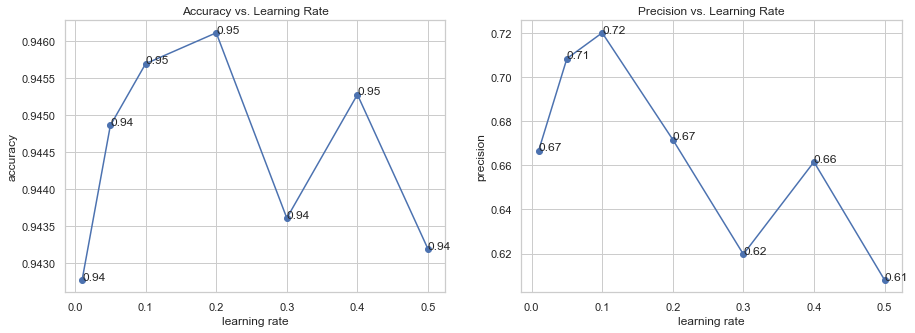

In [7]:
# plot the graph of accuracy and precision with two different subplots
sns.set_theme(style="whitegrid")
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
ax1.plot(learning_rate_list, accuracy_list, 'o-')
for i, txt in enumerate(accuracy_list):
    ax1.annotate(round(txt, 2), (learning_rate_list[i], accuracy_list[i])) # annotate the points
ax1.set_xlabel('learning rate')
ax1.set_ylabel('accuracy')
ax1.set_title('Accuracy vs. Learning Rate')

ax2.plot(learning_rate_list, precision_list, 'o-')
for i, txt in enumerate(precision_list):
    ax2.annotate(round(txt, 2), (learning_rate_list[i], precision_list[i])) # annotate the points
ax2.set_xlabel('learning rate')
ax2.set_ylabel('precision')
ax2.set_title('Precision vs. Learning Rate')
plt.show()

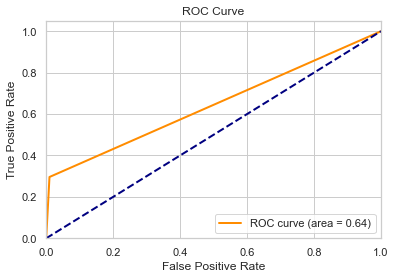

In [8]:
# hence, model with learning rate of 0.2 is performance the best
y_pred = modelXGB_02.predict(X_valid)

# compute ROC curve and AUC for each learning rate
fpr, tpr, thresholds = roc_curve(y_valid_t1, y_pred)
roc_auc = auc(fpr, tpr)

# plot the graph of ROC curve
sns.set_theme(style="whitegrid")
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")